In [1]:
# Import Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
%matplotlib inline

In [2]:
county_facts = pd.read_csv("county_facts.csv")
county_facts_dict = pd.read_csv("county_facts_dictionary.csv")
primary_results = pd.read_csv("primary_results.csv")

In [43]:
primary_results

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
6,Alabama,AL,Bibb,1007.0,Democrat,Bernie Sanders,246,0.197
7,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755
8,Alabama,AL,Blount,1009.0,Democrat,Bernie Sanders,395,0.386
9,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551


In [3]:
county_facts_dict

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"
5,AGE295214,"Persons under 18 years, percent, 2014"
6,AGE775214,"Persons 65 years and over, percent, 2014"
7,SEX255214,"Female persons, percent, 2014"
8,RHI125214,"White alone, percent, 2014"
9,RHI225214,"Black or African American alone, percent, 2014"


In [4]:
pd.options.display.max_columns = None

county_facts.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1,84.9,12.9,20.7,86.0,28.8,21263779,25.5,133957180,64.9,26.0,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,24.2,2207912,69.7,15.9,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6,85.0,1.6,3.5,85.6,20.9,5922,26.2,22751,76.8,8.3,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6,84.8,2.9,5.0,73.7,13.4,2120,24.6,11799,67.7,10.6,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [49]:
county_facts_state = county_facts[county_facts['state_abbreviation'].isnull()]

county_facts_state

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1,84.9,12.9,20.7,86.0,28.8,21263779,25.5,133957180,64.9,26.0,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,24.2,2207912,69.7,15.9,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
69,2000,Alaska,NaN,736732,710249,3.7,710231,7.4,25.3,9.4,47.4,66.9,3.9,14.8,6.1,1.3,7.1,6.8,61.9,80.3,7.0,16.2,91.6,27.5,71004,18.8,308583,63.8,24.0,241800,251899,2.75,32651,70760,9.9,20519,266627,3.3,52991,68728,1.5,10.0,3.1,0.3,0.0,25.9,8204030,4563605,9303387,13635,1851293,1518,570640.95,1.2
99,4000,Arizona,NaN,6731484,6392310,5.3,6392017,6.4,24.1,15.9,50.3,83.7,4.7,5.3,3.3,0.3,2.7,30.5,56.2,80.4,13.4,26.8,85.7,26.9,522382,24.6,2909218,64.4,20.7,165100,2370289,2.67,25358,49774,17.9,132762,2173205,1.8,420233,491529,2.0,1.9,3.3,0.0,10.7,28.1,57977827,57573459,86758801,13637,13268514,26997,113594.08,56.3
115,5000,Arkansas,NaN,2966369,2915958,1.7,2915918,6.5,23.8,15.7,50.9,79.7,15.6,1.0,1.5,0.3,1.9,7.0,73.4,83.6,4.5,7.2,83.7,20.1,237311,21.3,1341033,66.7,15.7,107300,1129723,2.53,22170,40768,19.2,64772,978094,0.0,191530,238994,5.5,1.1,1.4,0.1,2.3,24.5,60735582,29659789,32974282,11602,3559795,7666,52035.48,56.0
191,6000,California,NaN,38802500,37254503,4.2,37253956,6.5,23.6,12.9,50.3,73.2,6.5,1.7,14.4,0.5,3.7,38.6,38.5,84.2,27.0,43.7,81.2,30.7,1893539,27.2,13900766,55.3,31.0,366400,12542460,2.94,29527,61094,15.9,874243,13401863,3.5,2983996,3425510,4.0,1.3,14.9,0.3,16.5,30.3,491372092,598456486,455032270,12561,80852787,83645,155779.22,239.1
250,8000,Colorado,NaN,5355866,5029324,6.5,5029196,6.3,23.3,12.7,49.8,87.7,4.5,1.6,3.1,0.2,2.9,21.2,69.0,80.7,9.7,16.8,90.2,37.0,399458,24.5,2276184,65.4,25.9,236200,1977591,2.53,31109,58433,13.2,154875,2090975,2.7,447586,547770,1.7,0.8,2.6,0.1,6.2,29.2,46331953,53598986,65896788,13609,11440395,28686,103641.89,48.5
315,9000,Connecticut,NaN,3596677,3574096,0.6,3574097,5.3,21.6,15.5,51.2,81.2,11.5,0.5,4.5,0.1,2.2,15.0,68.8,88.0,13.6,21.5,89.2,36.5,217947,24.8,1493564,67.8,34.4,278900,1355849,2.55,37892,69461,10.2,88498,1473605,0.7,263511,332150,4.4,0.5,3.3,0.0,4.2,28.1,58404898,107917037,52165480,14953,9138437,5329,4842.36,738.1
324,10000,Delaware,NaN,935614,897936,4.2,897934,6.0,21.8,16.4,51.6,70.8,22.2,0.7,3.8,0.1,2.5,8.9,63.7,86.3,8.4,12.6,87.7,28.9,75081,24.8,417437,72.5,17.6,235800,335707,2.63,29819,59878,11.7,24151,382128,5.1,56861,74573,8.7,0.0,4.0,0.0,2.1,26.1,25679939,5727401,14202083,16421,1910770,5194,1948.54,460.8
328,11000,District Of Columbia,NaN,658893,601767,9.5,601723,6.5,17.5,11.3,52.6,43.6,49.0,0.6,4.0,0.2,2.6,10.4,35.8,80.6,13.8,15.8,88.4,52.4,30520,29.7,306174,42.1,62.3,445200,263649,2.20,45290,65830,18.6,21919,491130,1.7,52262,55887,28.2,0.9,5.9,0.0,6.1,34.5,332844,2117990,3843716,6555,4278171,4189,61.05,9856.5


In [51]:
county_facts_new = county_facts_state.reset_index()[['fips', 'area_name', 'state_abbreviation', 'PST045214', 'AGE295214', 'SEX255214',
                                               'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 
                                               'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213', 'LFE305213', 
                                               'INC110213', 'PVY020213', 'SBO001207', 'SBO315207', 'SBO115207', 'SBO215207', 
                                               'SBO515207', 'SBO415207', 'SBO015207', 'POP060210']]

county_facts_new.columns = ['fips', 'area_name', 'state_abbreviation', 'Population_2014', '18_and_younger', 'Female', 'White', 'Black', 
                            'American_Indian_Alaskan_Native', 'Asian', 'Native_Hawaiian_Pacific_Islander', 'Two_or_More_Races',
                            'Foreign_born_persons', 'Language_other_than_English_spoken_at_home', 'High_school', 'College', 
                            'Veterans', 'Commute', 'Median_household_income', 'Poverty', 'Total_number_of_firms', 
                            'Black_owned_firms', 'American_Indian_Alaska_Native_owned_firms', 'Asian_owned_firms', 
                            'Native_Hawaiian_and_Other_Pacific_Islander_owned_firms', 'Hispanic_owned_firms', 
                            'Hispanic_owned_firms', 'Population_per_square_mile']

county_facts_new.head()

,fips,area_name,state_abbreviation,Population_2014,18_and_younger,Female,White,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Hispanic_owned_firms,Population_per_square_mile
0,0,United States,NaN,318857056,23.1,50.8,77.4,13.2,1.2,5.4,0.2,2.5,12.9,20.7,86.0,28.8,21263779,25.5,53046,15.4,27092908,7.1,0.9,5.7,0.1,8.3,28.8,87.4
1,1000,Alabama,NaN,4849377,22.8,51.5,69.7,26.7,0.7,1.3,0.1,1.5,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4
2,2000,Alaska,NaN,736732,25.3,47.4,66.9,3.9,14.8,6.1,1.3,7.1,7.0,16.2,91.6,27.5,71004,18.8,70760,9.9,68728,1.5,10.0,3.1,0.3,0.0,25.9,1.2
3,4000,Arizona,NaN,6731484,24.1,50.3,83.7,4.7,5.3,3.3,0.3,2.7,13.4,26.8,85.7,26.9,522382,24.6,49774,17.9,491529,2.0,1.9,3.3,0.0,10.7,28.1,56.3
4,5000,Arkansas,NaN,2966369,23.8,50.9,79.7,15.6,1.0,1.5,0.3,1.9,4.5,7.2,83.7,20.1,237311,21.3,40768,19.2,238994,5.5,1.1,1.4,0.1,2.3,24.5,56.0


In [50]:
#state_facts = pd.read_csv("state_facts.csv")
#state_facts

In [7]:
state_facts.columns = ['fips', 'area_name', 'Population_2014', '18_and_younger', 'Female', 'White', 'Minority', 'Black', 
                            'American_Indian_Alaskan_Native', 'Asian', 'Native_Hawaiian_Pacific_Islander', 'Two_or_More_Races', 
                            'Hispanic_or_Latino', 'White_not_Hispanic_or_Latino', 'Foreign_born_persons', 'Language_other_than_English_spoken_at_home',
                            'High_school', 'College', 
                            'Veterans', 'Commute', 'Median_household_income', 'Poverty', 'Total_number_of_firms', 
                            'Black_owned_firms', 'American_Indian_Alaska_Native_owned_firms', 'Asian_owned_firms', 
                            'Native_Hawaiian_and_Other_Pacific_Islander_owned_firms', 'Hispanic_owned_firms', 
                            'Women_owned_firms', 'Population_per_square_mile', 'Democrat_votes', 'Dvotes_of_total_votes',
                            'Dvotes_of_population', 'Republican_votes', 'Rvotes_of_total_votes', 'Rvotes_of_population', 'Total_votes', 'Winning_party']
state_facts

,fips,area_name,Population_2014,18_and_younger,Female,White,Minority,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Hispanic_or_Latino,White_not_Hispanic_or_Latino,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Women_owned_firms,Population_per_square_mile,Democrat_votes,Dvotes_of_total_votes,Dvotes_of_population,Republican_votes,Rvotes_of_total_votes,Rvotes_of_population,Total_votes,Winning_party
0,1000,Alabama,4849377,22.8,51.5,69.7,30.3,26.7,0.7,1.3,0.1,1.5,4.1,66.2,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4,386327.0,0.315637,0.079665,837632.0,0.684363,0.172730,1223959,Republican
1,2000,Alaska,736732,25.3,47.4,66.9,33.2,3.9,14.8,6.1,1.3,7.1,6.8,61.9,7.0,16.2,91.6,27.5,71004,18.8,70760,9.9,68728,1.5,10.0,3.1,0.3,0.0,25.9,1.2,539.0,0.023989,0.000732,21930.0,0.976011,0.029767,22469,Republican
2,4000,Arizona,6731484,24.1,50.3,83.7,16.3,4.7,5.3,3.3,0.3,2.7,30.5,56.2,13.4,26.8,85.7,26.9,522382,24.6,49774,17.9,491529,2.0,1.9,3.3,0.0,10.7,28.1,56.3,399097.0,0.478419,0.059288,435103.0,0.521581,0.064637,834200,Republican
3,5000,Arkansas,2966369,23.8,50.9,79.7,20.3,15.6,1.0,1.5,0.3,1.9,7.0,73.4,4.5,7.2,83.7,20.1,237311,21.3,40768,19.2,238994,5.5,1.1,1.4,0.1,2.3,24.5,56.0,209448.0,0.345640,0.070608,396523.0,0.654360,0.133673,605971,Republican
4,6000,California,38802500,23.6,50.3,73.2,26.8,6.5,1.7,14.4,0.5,3.7,38.6,38.5,27.0,43.7,81.2,30.7,1893539,27.2,61094,15.9,3425510,4.0,1.3,14.9,0.3,16.5,30.3,239.1,3442623.0,0.697142,0.088722,1495574.0,0.302858,0.038543,4938197,Democrat
5,8000,Colorado,5355866,23.3,49.8,87.7,12.3,4.5,1.6,3.1,0.2,2.9,21.2,69.0,9.7,16.8,90.2,37.0,399458,24.5,58433,13.2,547770,1.7,0.8,2.6,0.1,6.2,29.2,48.5,121184.0,1.000000,0.022626,0.0,0.000000,0.000000,121184,NaN
6,9000,Connecticut,3596677,21.6,51.2,81.2,18.8,11.5,0.5,4.5,0.1,2.2,15.0,68.8,13.6,21.5,89.2,36.5,217947,24.8,69461,10.2,332150,4.4,0.5,3.3,0.0,4.2,28.1,738.1,322485.0,0.606971,0.089662,208817.0,0.393029,0.058058,531302,Democrat
7,10000,Delaware,935614,21.8,51.6,70.8,29.3,22.2,0.7,3.8,0.1,2.5,8.9,63.7,8.4,12.6,87.7,28.9,75081,24.8,59878,11.7,74573,8.7,0.0,4.0,0.0,2.1,26.1,460.8,92609.0,0.577305,0.098982,67807.0,0.422695,0.072473,160416,Democrat
8,12000,Florida,19893297,20.4,51.1,77.8,22.2,16.8,0.5,2.8,0.1,2.0,24.1,55.8,19.4,27.4,86.1,26.4,1569406,25.9,46956,16.3,2009589,9.0,0.5,3.2,0.1,22.4,28.9,350.6,1664003.0,0.422236,0.083646,2276926.0,0.577764,0.114457,3940929,Republican
9,13000,Georgia,10097343,24.7,51.2,62.1,37.9,31.5,0.5,3.8,0.1,2.0,9.3,54.3,9.7,13.3,84.7,28.0,690208,27.0,49179,18.2,901105,20.4,0.7,5.1,0.1,3.6,30.9,168.4,757340.0,0.372534,0.075004,1275601.0,0.627466,0.126330,2032941,Republican


In [10]:
democrat_states = state_facts[state_facts['Winning_party'] == 'Democrat']
democrat_states

,fips,area_name,Population_2014,18_and_younger,Female,White,Minority,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Hispanic_or_Latino,White_not_Hispanic_or_Latino,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Women_owned_firms,Population_per_square_mile,Democrat_votes,Dvotes_of_total_votes,Dvotes_of_population,Republican_votes,Rvotes_of_total_votes,Rvotes_of_population,Total_votes,Winning_party
4,6000,California,38802500,23.6,50.3,73.2,26.8,6.5,1.7,14.4,0.5,3.7,38.6,38.5,27.0,43.7,81.2,30.7,1893539,27.2,61094,15.9,3425510,4.0,1.3,14.9,0.3,16.5,30.3,239.1,3442623.0,0.697142,0.088722,1495574.0,0.302858,0.038543,4938197,Democrat
6,9000,Connecticut,3596677,21.6,51.2,81.2,18.8,11.5,0.5,4.5,0.1,2.2,15.0,68.8,13.6,21.5,89.2,36.5,217947,24.8,69461,10.2,332150,4.4,0.5,3.3,0.0,4.2,28.1,738.1,322485.0,0.606971,0.089662,208817.0,0.393029,0.058058,531302,Democrat
7,10000,Delaware,935614,21.8,51.6,70.8,29.3,22.2,0.7,3.8,0.1,2.5,8.9,63.7,8.4,12.6,87.7,28.9,75081,24.8,59878,11.7,74573,8.7,0.0,4.0,0.0,2.1,26.1,460.8,92609.0,0.577305,0.098982,67807.0,0.422695,0.072473,160416,Democrat
10,15000,Hawaii,1419561,21.7,49.4,26.7,73.4,2.5,0.4,37.5,10.0,23.0,10.1,23.0,17.9,25.4,90.4,30.1,112625,26.0,67402,11.2,120374,0.9,1.3,47.2,9.5,3.6,31.0,211.8,33658.0,0.717869,0.023710,13228.0,0.282131,0.009318,46886,Democrat
12,17000,Illinois,12880580,23.2,50.9,77.5,22.5,14.7,0.6,5.3,0.1,1.8,16.7,62.3,13.8,22.3,87.3,31.4,727919,28.0,56797,14.1,1123817,9.5,0.5,5.3,0.1,5.0,30.5,231.1,1987834.0,0.589418,0.154328,1384703.0,0.410582,0.107503,3372537,Democrat
16,21000,Kentucky,4413457,22.9,50.8,88.3,11.8,8.2,0.3,1.4,0.1,1.8,3.4,85.4,3.3,5.0,83.0,21.5,312365,22.8,43036,18.8,337600,3.1,0.3,1.6,0.0,1.1,25.6,109.9,423176.0,0.652159,0.095883,225709.0,0.347841,0.051141,648885,Democrat
17,22000,Louisiana,4649676,23.9,51.1,63.4,36.7,32.5,0.8,1.8,0.1,1.5,4.8,59.3,3.9,8.7,82.6,21.8,304271,24.9,44874,19.1,375808,15.9,0.7,2.8,0.0,2.9,27.4,104.9,293855.0,0.501647,0.063199,291926.0,0.498353,0.062784,585781,Democrat
19,24000,Maryland,5976407,22.6,51.5,60.1,40.0,30.3,0.6,6.4,0.1,2.6,9.3,52.6,14.0,16.7,88.7,36.8,427068,32.0,73538,9.8,528112,19.3,0.6,6.8,0.1,4.9,32.6,594.8,814522.0,0.660456,0.136290,418750.0,0.339544,0.070067,1233272,Democrat
20,25000,Massachusetts,6745408,20.6,51.5,82.6,17.4,8.3,0.5,6.3,0.1,2.2,10.8,74.3,15.0,21.9,89.4,39.4,383087,28.0,66866,11.4,596790,3.4,0.4,4.5,0.0,3.3,29.8,839.4,1198652.0,0.661026,0.177699,614668.0,0.338974,0.091124,1813320,Democrat
29,34000,New Jersey,8938175,22.5,51.2,73.0,27.0,14.8,0.6,9.4,0.1,2.1,19.3,56.8,21.2,30.0,88.1,35.8,437652,30.4,71629,10.4,781622,7.7,0.4,8.7,0.1,8.7,27.3,1195.5,877496.0,0.664156,0.098174,443724.0,0.335844,0.049644,1321220,Democrat


In [29]:
len(democrat_states)

17

In [13]:
republican_states = state_facts[state_facts['Winning_party'] == 'Republican']
republican_states

,fips,area_name,Population_2014,18_and_younger,Female,White,Minority,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Hispanic_or_Latino,White_not_Hispanic_or_Latino,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Women_owned_firms,Population_per_square_mile,Democrat_votes,Dvotes_of_total_votes,Dvotes_of_population,Republican_votes,Rvotes_of_total_votes,Rvotes_of_population,Total_votes,Winning_party
0,1000,Alabama,4849377,22.8,51.5,69.7,30.3,26.7,0.7,1.3,0.1,1.5,4.1,66.2,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4,386327.0,0.315637,0.079665,837632.0,0.684363,0.172730,1223959,Republican
1,2000,Alaska,736732,25.3,47.4,66.9,33.2,3.9,14.8,6.1,1.3,7.1,6.8,61.9,7.0,16.2,91.6,27.5,71004,18.8,70760,9.9,68728,1.5,10.0,3.1,0.3,0.0,25.9,1.2,539.0,0.023989,0.000732,21930.0,0.976011,0.029767,22469,Republican
2,4000,Arizona,6731484,24.1,50.3,83.7,16.3,4.7,5.3,3.3,0.3,2.7,30.5,56.2,13.4,26.8,85.7,26.9,522382,24.6,49774,17.9,491529,2.0,1.9,3.3,0.0,10.7,28.1,56.3,399097.0,0.478419,0.059288,435103.0,0.521581,0.064637,834200,Republican
3,5000,Arkansas,2966369,23.8,50.9,79.7,20.3,15.6,1.0,1.5,0.3,1.9,7.0,73.4,4.5,7.2,83.7,20.1,237311,21.3,40768,19.2,238994,5.5,1.1,1.4,0.1,2.3,24.5,56.0,209448.0,0.345640,0.070608,396523.0,0.654360,0.133673,605971,Republican
8,12000,Florida,19893297,20.4,51.1,77.8,22.2,16.8,0.5,2.8,0.1,2.0,24.1,55.8,19.4,27.4,86.1,26.4,1569406,25.9,46956,16.3,2009589,9.0,0.5,3.2,0.1,22.4,28.9,350.6,1664003.0,0.422236,0.083646,2276926.0,0.577764,0.114457,3940929,Republican
9,13000,Georgia,10097343,24.7,51.2,62.1,37.9,31.5,0.5,3.8,0.1,2.0,9.3,54.3,9.7,13.3,84.7,28.0,690208,27.0,49179,18.2,901105,20.4,0.7,5.1,0.1,3.6,30.9,168.4,757340.0,0.372534,0.075004,1275601.0,0.627466,0.126330,2032941,Republican
11,16000,Idaho,1634464,26.4,49.9,93.5,6.4,0.8,1.7,1.4,0.2,2.3,12.0,82.8,5.9,10.4,88.8,25.1,122955,20.0,46767,15.5,151671,0.2,0.9,0.8,0.0,2.6,23.5,19.0,23705.0,0.099189,0.014503,215284.0,0.900811,0.131715,238989,Republican
13,18000,Indiana,6596855,24.0,50.7,86.1,14.0,9.6,0.4,2.0,0.1,1.9,6.6,80.3,4.7,8.2,87.2,23.2,455105,23.2,48248,15.4,482847,4.6,0.5,1.8,0.0,1.8,26.8,181.0,638638.0,0.371454,0.096809,1080653.0,0.628546,0.163813,1719291,Republican
14,19000,Iowa,3107126,23.4,50.3,92.1,7.9,3.4,0.5,2.2,0.1,1.7,5.6,87.1,4.5,7.2,91.0,25.7,226175,18.8,51843,12.4,259931,0.8,0.2,1.1,0.1,0.9,25.5,54.5,139980.0,0.428461,0.045051,186724.0,0.571539,0.060095,326704,Republican
15,20000,Kansas,2904021,24.9,50.2,86.8,13.2,6.3,1.2,2.8,0.1,2.8,11.4,76.8,6.7,11.0,89.8,30.3,211113,19.0,51332,13.7,237040,2.4,0.9,2.0,0.0,2.4,27.5,34.9,39043.0,0.350803,0.013444,72253.0,0.649197,0.024880,111296,Republican


In [28]:
len(republican_states)

29

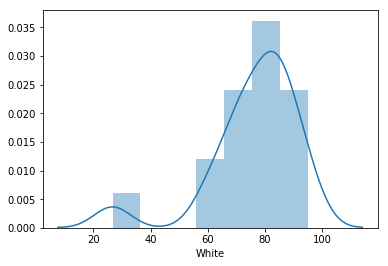

In [16]:
sns.distplot(democrat_states['White']);

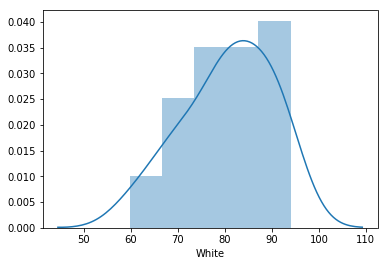

In [17]:
sns.distplot(republican_states['White']);

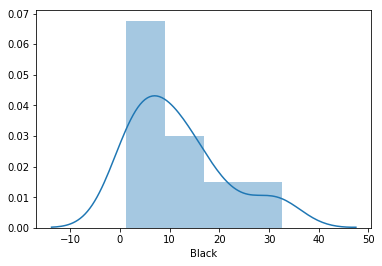

In [18]:
sns.distplot(democrat_states['Black']);

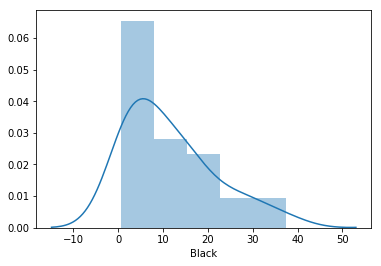

In [19]:
sns.distplot(republican_states['Black']);

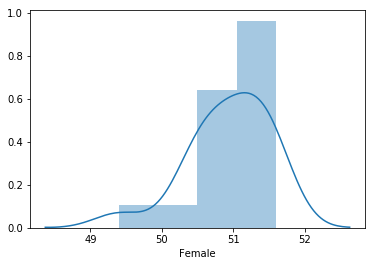

In [21]:
sns.distplot(democrat_states['Female']);

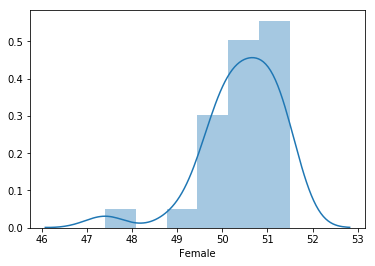

In [20]:
sns.distplot(republican_states['Female']);

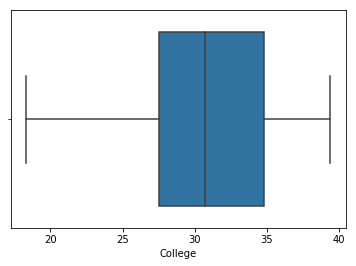

In [24]:
sns.boxplot(democrat_states['College']);

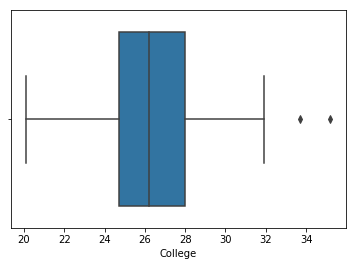

In [25]:
sns.boxplot(republican_states['College']);

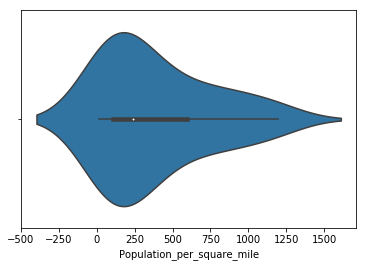

In [26]:
sns.violinplot(democrat_states['Population_per_square_mile']);

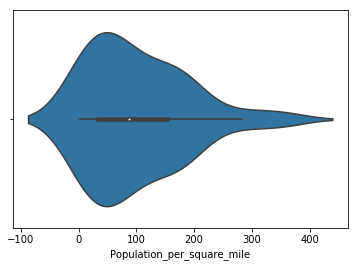

In [32]:
sns.violinplot(republican_states['Population_per_square_mile']);

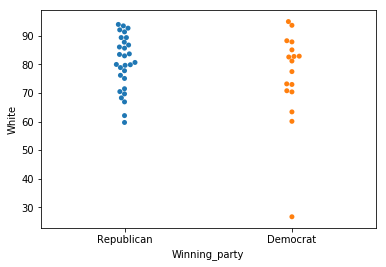

In [34]:
sns.swarmplot(x='Winning_party', y="White", data=state_facts);

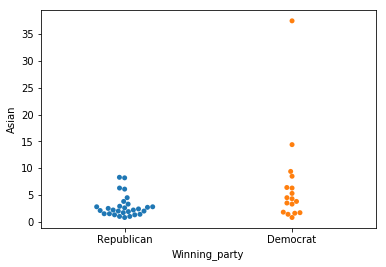

In [36]:
sns.swarmplot(x='Winning_party', y="Asian", data=state_facts);

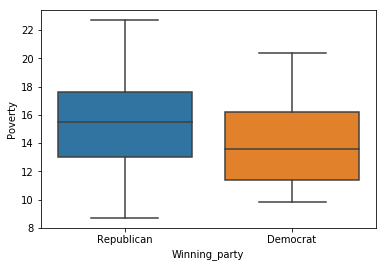

In [37]:
sns.boxplot(x="Winning_party", y="Poverty", data=state_facts);

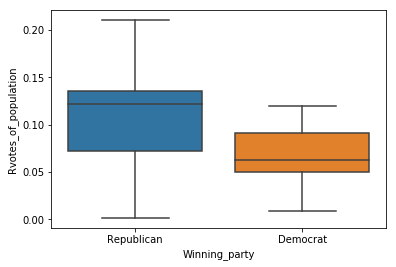

In [42]:
sns.boxplot(x="Winning_party", y="Rvotes_of_population", data=state_facts);